# required libraries and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Thyroid_Diff.csv")
df.head(6)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No


# data pre-preparation

In [3]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
df.duplicated().sum()

np.int64(19)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().any()

np.False_

In [8]:
# Explore Categorical Columns

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Create a DataFrame from categorical columns with their unique values
cat_feature_info = pd.DataFrame(columns=['Feature', 'Unique_Values'])
for cat_feat in categorical_columns:
    unique_values = df[cat_feat].unique()
    cat_feature_info = pd.concat([cat_feature_info, pd.DataFrame({'Feature': cat_feat, 'Unique_Values': [unique_values]})], ignore_index=True)

display(cat_feature_info)

,Feature,Unique_Values
0,Gender,"[F, M]"
1,Smoking,"[No, Yes]"
2,Hx Smoking,"[No, Yes]"
3,Hx Radiothreapy,"[No, Yes]"
4,Thyroid Function,"[Euthyroid, Clinical Hyperthyroidism, Clinical..."
5,Physical Examination,"[Single nodular goiter-left, Multinodular goit..."
6,Adenopathy,"[No, Right, Extensive, Left, Bilateral, Poster..."
7,Pathology,"[Micropapillary, Papillary, Follicular, Hurthe..."
8,Focality,"[Uni-Focal, Multi-Focal]"
9,Risk,"[Low, Intermediate, High]"


# Data analysis

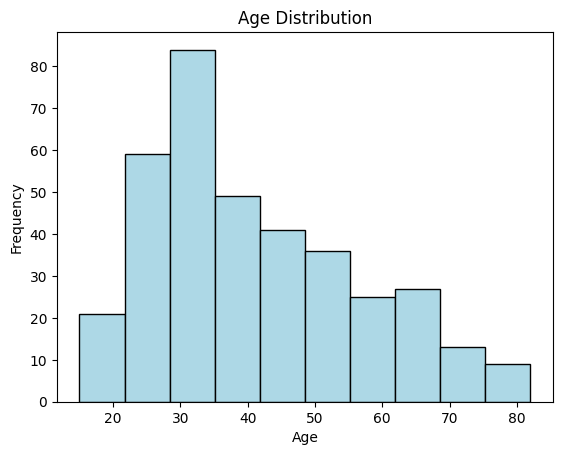

In [11]:
plt.hist(df['Age'], bins=10, color='lightblue', edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

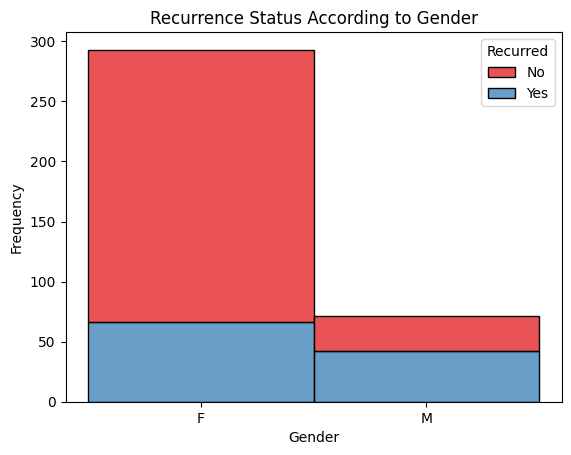

In [12]:
# create Histogram 
sns.histplot(data=df, x='Gender', hue='Recurred', multiple='stack', palette='Set1')

plt.title('Recurrence Status According to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.show()

C:\Users\canus\AppData\Local\Temp\ipykernel_11004\2831486222.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
C:\Users\canus\AppData\Local\Temp\ipykernel_11004\2831486222.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
C:\Users\canus\AppData\Local\Temp\ipykernel_11004\2831486222.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)
C:\Users\canus\AppData\Local\Temp\ipykernel_11004\2831486222.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

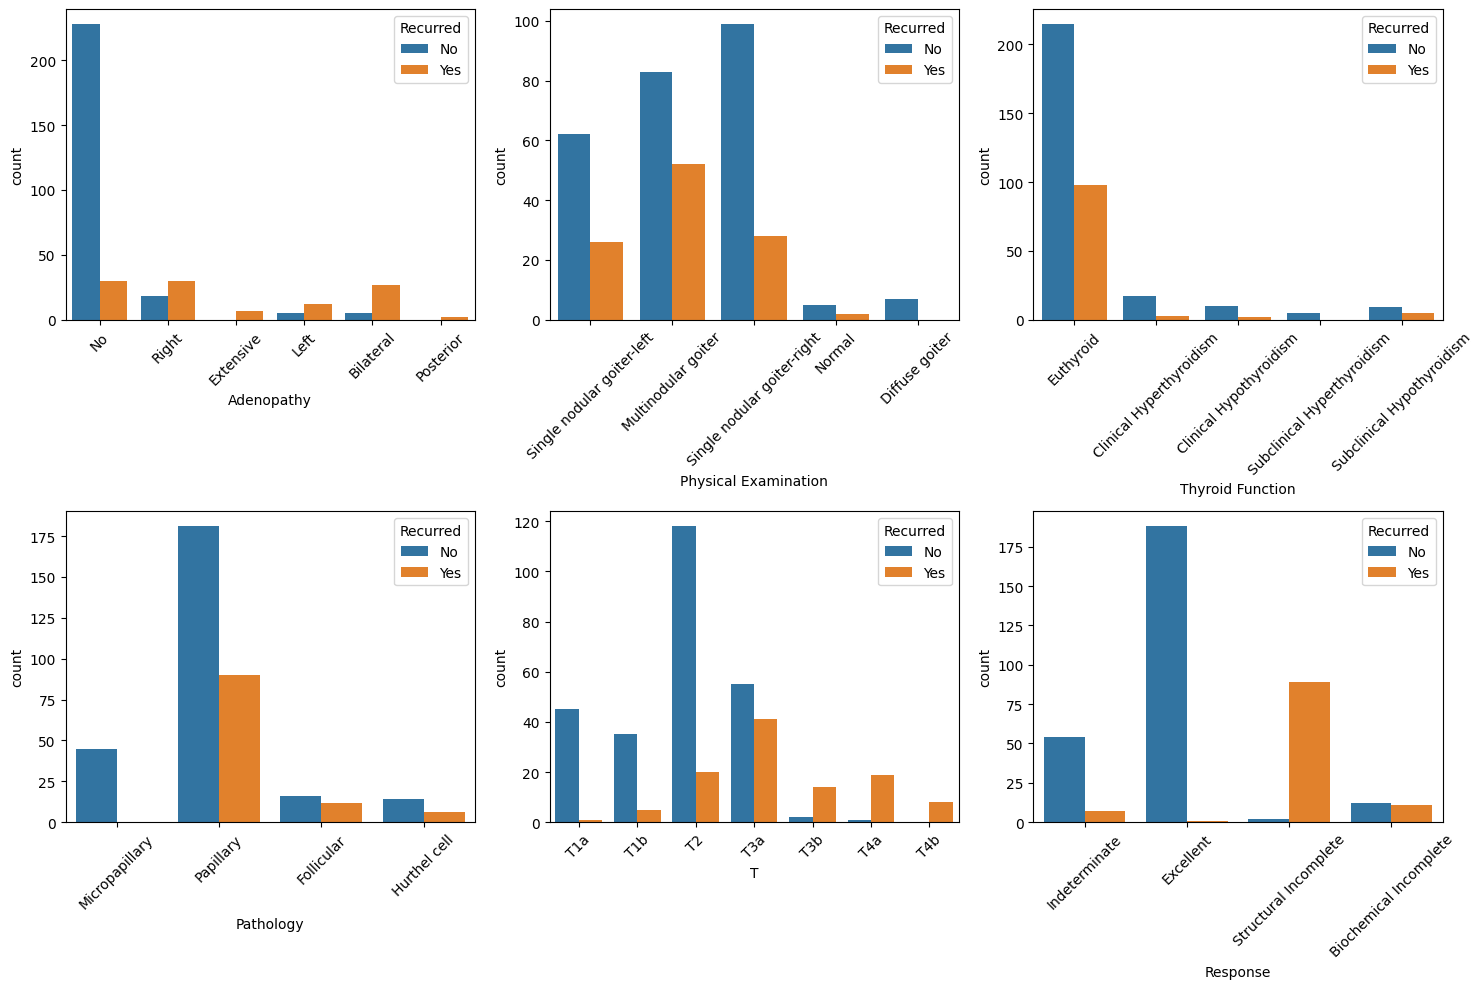

In [13]:
# cratae fig
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# 1. Graph
sns.countplot(x="Adenopathy", data=df, hue="Recurred", ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# 2. Graph
sns.countplot(x="Physical Examination", data=df, hue="Recurred", ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# 3. Graph
sns.countplot(x="Thyroid Function", data=df, hue="Recurred", ax=axes[0, 2])
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)

# 4. Graph
sns.countplot(x="Pathology", data=df, hue="Recurred", ax=axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# 5. Graph
sns.countplot(x="T", data=df, hue="Recurred", ax=axes[1, 1])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

# 6. Graph
sns.countplot(x="Response", data=df, hue="Recurred", ax=axes[1, 2])
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
columns=["Gender","Smoking", "Hx Smoking", "Hx Radiothreapy", "Focality", "M", "Recurred"]
encoder=LabelEncoder()
for column in columns:
  df[column]=encoder.fit_transform(df[column])
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,Low,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,0,I,Excellent,0


In [15]:
column=["Thyroid Function","Physical Examination", "Adenopathy", "Pathology", "Focality", "Risk", "T", "N", "Stage", "Response"]
df=pd.get_dummies(df,columns=column,dtype=int)
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,M,Recurred,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,...,N_N1b,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,34,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,30,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,62,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,62,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


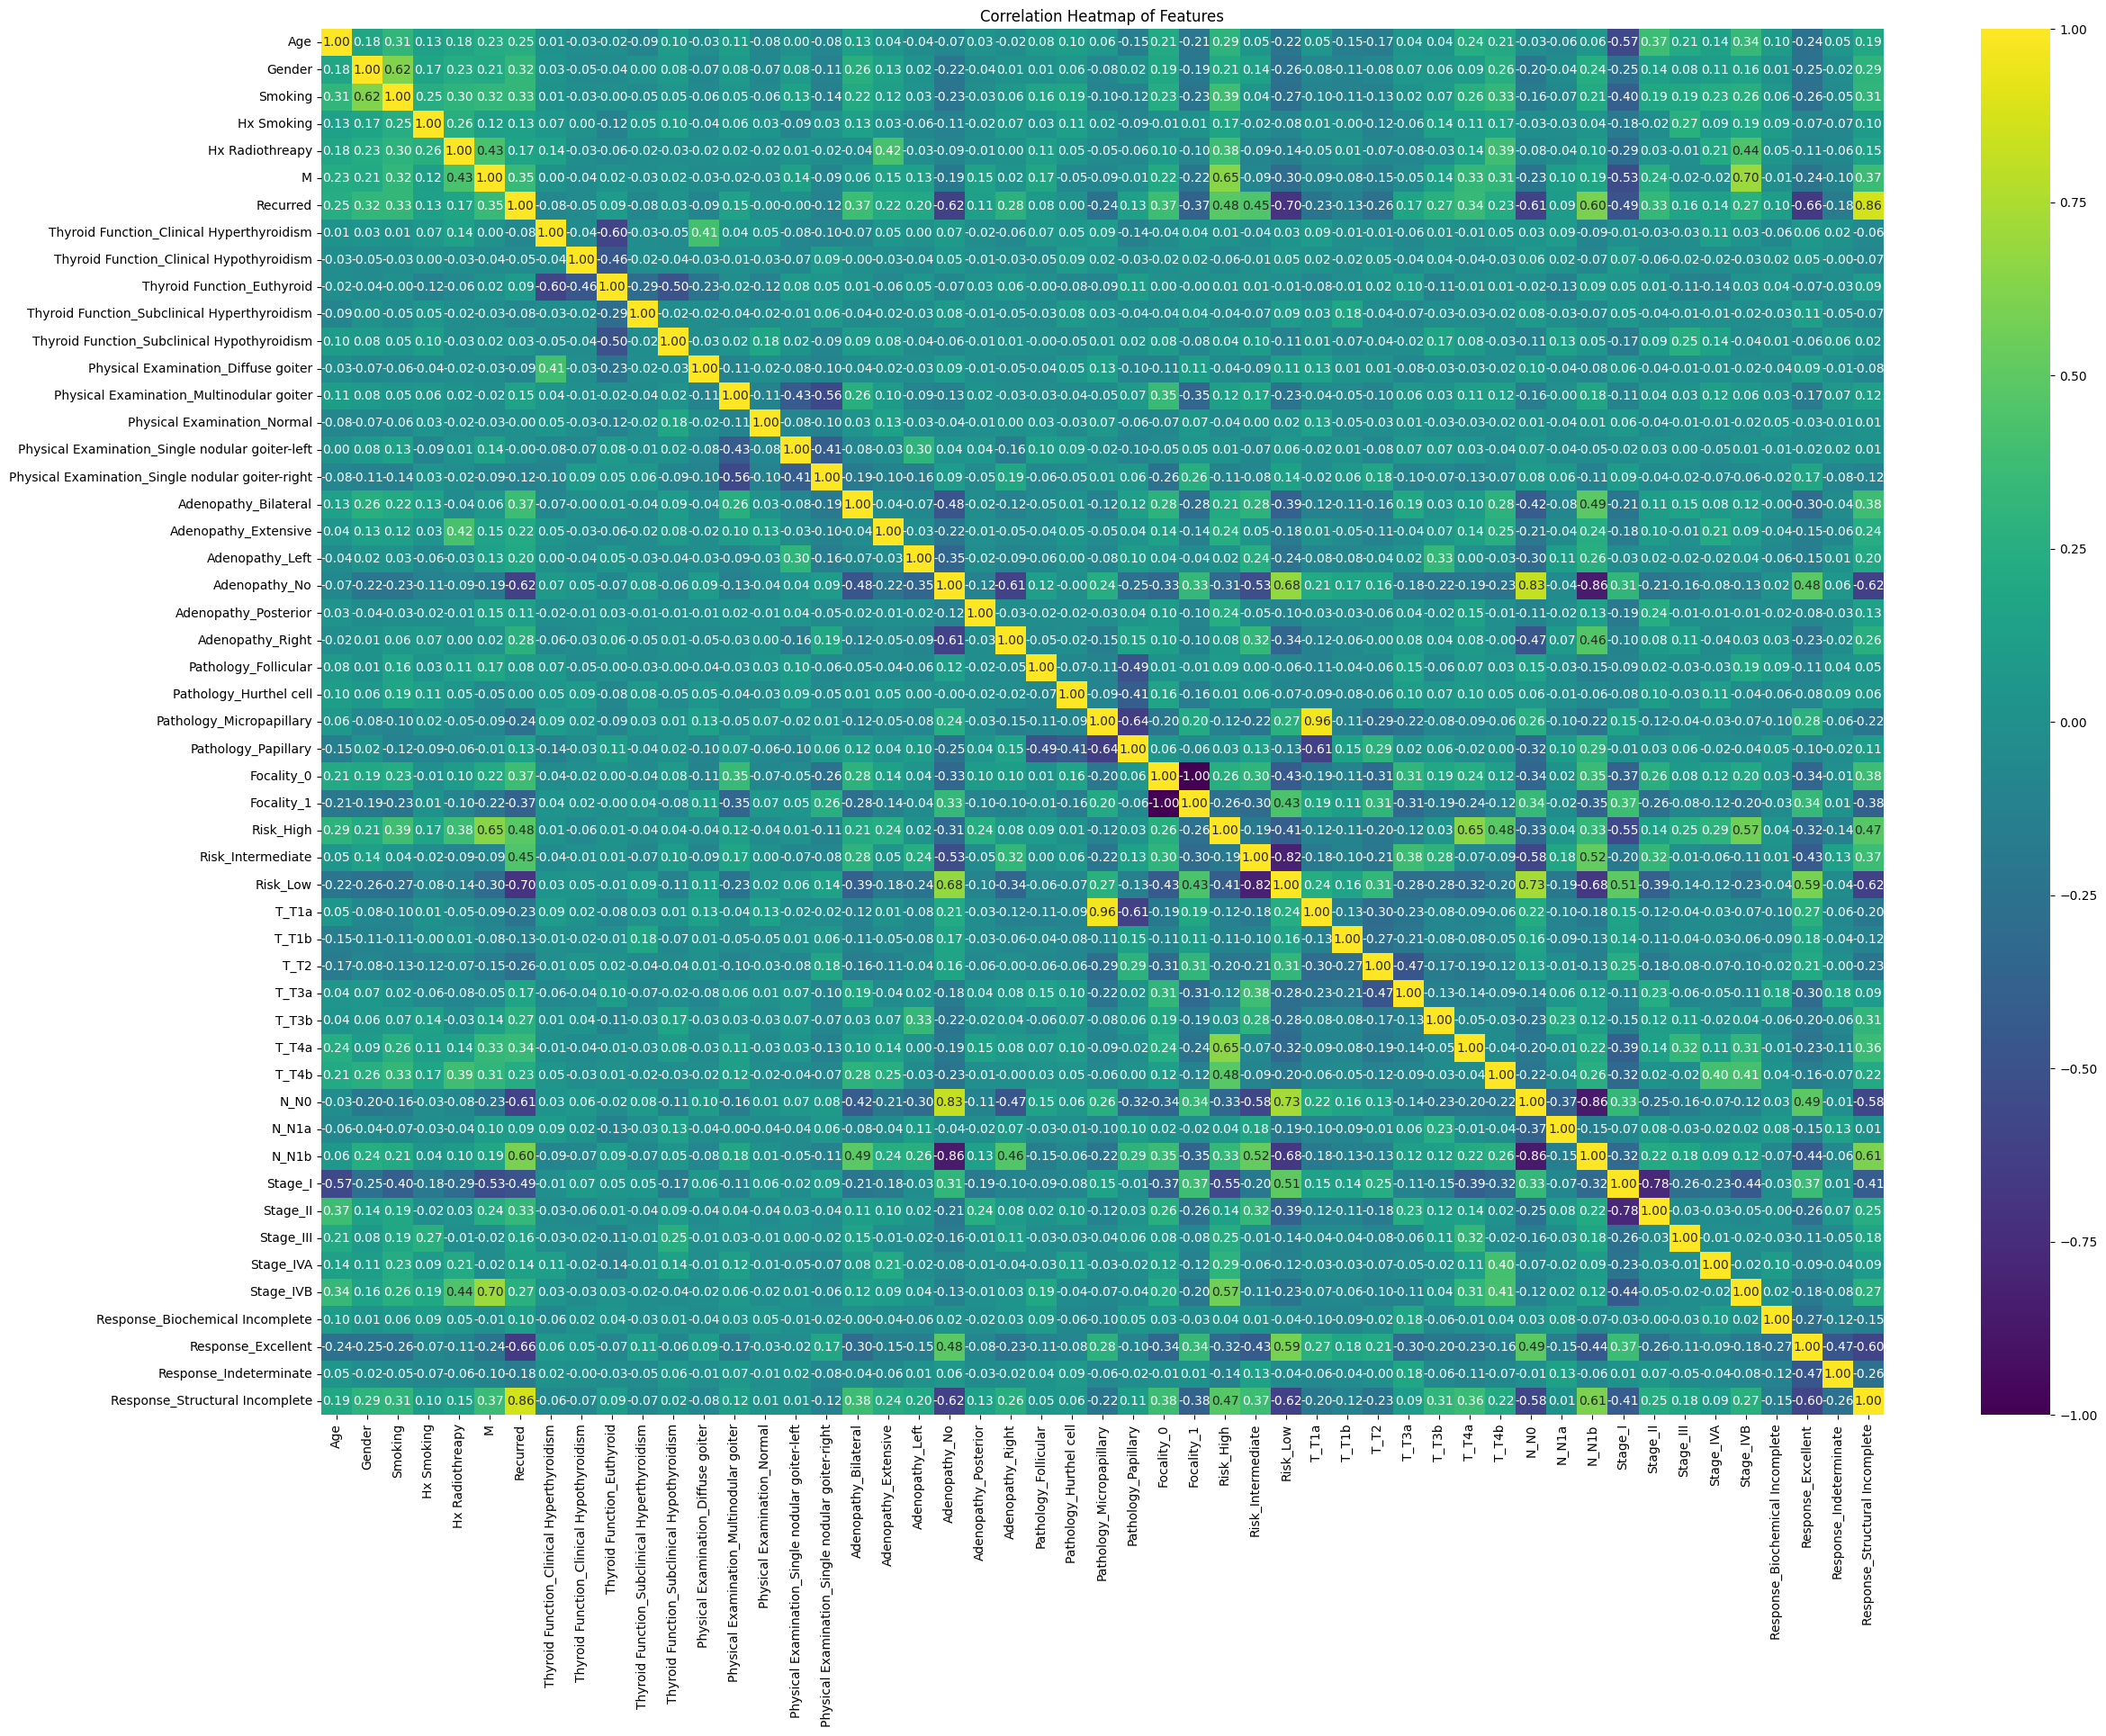

In [16]:
plt.figure(figsize=(28, 20))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# ML Models

In [17]:
y = df.pop("Recurred") 
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Recurred, Length: 364, dtype: int64

In [18]:
X = df.to_numpy() 
X

array([[27,  0,  0, ...,  0,  1,  0],
       [34,  0,  0, ...,  1,  0,  0],
       [30,  0,  0, ...,  1,  0,  0],
       ...,
       [72,  1,  1, ...,  0,  0,  1],
       [61,  1,  1, ...,  0,  0,  1],
       [67,  1,  1, ...,  0,  0,  1]])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 44)

# Decision Tree

In [35]:
%%time
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import logging

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optimizasyon fonksiyonu
def objective(trial):
    # Decision Tree için hiperparametrelerin aralıklarını tanımla
    max_depth = trial.suggest_int("max_depth", 1, 50)  # Maksimum derinlik
    min_samples_split = trial.suggest_int("min_samples_split", 2, 50)  # Bölünme için gereken minimum örnek sayısı
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 50)  # Yaprak düğümündeki minimum örnek sayısı
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])  # Kullanılacak maksimum özellik
    splitter = trial.suggest_categorical("splitter", ["best", "random"])  # Bölünme stratejisi

    # DecisionTreeClassifier modelini oluştur
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        splitter=splitter,
        random_state=44
    )

    # Çapraz doğrulama ile modelin performansını ölç
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    return np.mean(scores)

# Optuna çalışmasını başlat
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600, n_jobs=-1, show_progress_bar=True)

# En iyi hiperparametreleri yazdır
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

# En iyi modeli test seti üzerinde değerlendir
best_params = study.best_params

  0%|          | 0/50 [00:00<?, ?it/s]

Best parameters: {'max_depth': 50, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_features': None, 'splitter': 'random'}
Best cross-validation accuracy: 0.9414942528735631
CPU times: total: 7.2 s
Wall time: 6.42 s


In [36]:
# Decision Tree modeli en iyi hiperparametrelerle eğit
tree = DecisionTreeClassifier(
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    splitter=best_params["splitter"],
    random_state=44
)

tree.fit(X_train, y_train)
y_tree_pred = tree.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_tree_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.82      0.90        22

    accuracy                           0.95        73
   macro avg       0.96      0.91      0.93        73
weighted avg       0.95      0.95      0.94        73



In [38]:
# Decision Tree Classifier Performans Değerlendirmesi

# Çapraz Doğrulama (Cross-Validation)
from sklearn.model_selection import cross_val_score
cv_tree = cross_val_score(tree, X_train, y_train, cv=10, scoring="accuracy")
cv_mean_accuracy = cv_tree.mean()

# Doğruluk Skoru (Accuracy) - Eğitim ve Test Setleri
from sklearn.metrics import accuracy_score
y_pred_tree_train = tree.predict(X_train)  # Eğitim seti tahminleri
y_pred_tree_test = tree.predict(X_test)    # Test seti tahminleri

accuracy_tree_train = accuracy_score(y_train, y_pred_tree_train)
accuracy_tree_test = accuracy_score(y_test, y_pred_tree_test)

# F1 Skoru
from sklearn.metrics import f1_score
f1_tree_train = f1_score(y_train, y_pred_tree_train, average="weighted")
f1_tree_test = f1_score(y_test, y_pred_tree_test, average="weighted")

# ROC-AUC Skoru (Sadece ikili sınıflandırma için anlamlı)
from sklearn.metrics import roc_auc_score
# predict_proba çıktısını al ve roc_auc_score hesapla
y_proba = tree.predict_proba(X_test)[:, 1]  # Pozitif sınıf (1) için olasılığı seç
roc_auc_tree = roc_auc_score(y_test, y_proba) #ROC-AUC skoru sadece predict_proba destekleyen modellerde hesaplanabilir

# Precision ve Recall (Hassasiyet ve Duyarlılık)
from sklearn.metrics import precision_score, recall_score
precision_tree = precision_score(y_test, y_pred_tree_test, average="weighted")
recall_tree = recall_score(y_test, y_pred_tree_test, average="weighted")

# Sonuçları Yazdır
print("CV Mean Accuracy: ", cv_mean_accuracy)
print("Accuracy (Train): ", accuracy_tree_train)
print("Accuracy (Test): ", accuracy_tree_test)
print("F1 Score (Train): ", f1_tree_train)
print("F1 Score (Test): ", f1_tree_test)
print("ROC-AUC Score: ", roc_auc_tree)
print("Precision: ", precision_tree)
print("Recall: ", recall_tree)
print("------------------------------------------------")
print("Cross-Validation Scores: ", cv_tree)

CV Mean Accuracy:  0.9414942528735631
Accuracy (Train):  0.9415807560137457
Accuracy (Test):  0.9452054794520548
F1 Score (Train):  0.9400902431648167
F1 Score (Test):  0.9434996123029206
ROC-AUC Score:  0.9768270944741533
Precision:  0.9491905354919052
Recall:  0.9452054794520548
------------------------------------------------
Cross-Validation Scores:  [0.96666667 0.86206897 0.89655172 1.         0.93103448 1.
 0.96551724 0.93103448 0.89655172 0.96551724]


# Random Forest

In [39]:
%%time
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import logging

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optimizasyon fonksiyonu
def objective(trial):
    # Random Forest için hiperparametrelerin aralıklarını tanımla
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Ağaç sayısı
    max_depth = trial.suggest_int("max_depth", 1, 50)  # Maksimum derinlik
    min_samples_split = trial.suggest_int("min_samples_split", 2, 50)  # Bölünme için gereken minimum örnek sayısı
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 50)  # Yaprak düğümündeki minimum örnek sayısı
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])  # Kullanılacak maksimum özellik

    # RandomForestClassifier modelini oluştur
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=44,
        n_jobs=-1  # Paralel işlem desteği
    )

    # Çapraz doğrulama ile modelin performansını ölç
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1)
    return np.mean(scores)

# Optuna çalışmasını başlat
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600, n_jobs=-1, show_progress_bar=True)

# En iyi hiperparametreleri yazdır
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

best_params = study.best_params  

  0%|          | 0/50 [00:00<?, ?it/s]

Best parameters: {'n_estimators': 389, 'max_depth': 26, 'min_samples_split': 14, 'min_samples_leaf': 27, 'max_features': None}
Best cross-validation accuracy: 0.9414942528735631
CPU times: total: 5.02 s
Wall time: 54.6 s


In [40]:
# En iyi modeli test seti üzerinde değerlendir                                                                                                            # Random Forest modeli en iyi hiperparametrelerle eğit
forest = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    random_state=44,
    n_jobs=-1
)

forest.fit(X_train, y_train)
y_forest_pred = forest.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_forest_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.82      0.90        22

    accuracy                           0.95        73
   macro avg       0.96      0.91      0.93        73
weighted avg       0.95      0.95      0.94        73



In [42]:
# Random Forest Classifier Performans Değerlendirmesi

# Çapraz Doğrulama (Cross-Validation)
from sklearn.model_selection import cross_val_score
cv_forest = cross_val_score(forest, X_train, y_train, cv=10, scoring="accuracy")
cv_mean_accuracy = cv_forest.mean()

# Doğruluk Skoru (Accuracy) - Eğitim ve Test Setleri
from sklearn.metrics import accuracy_score
y_pred_forest_train = forest.predict(X_train)  # Eğitim seti tahminleri
y_pred_forest_test = forest.predict(X_test)    # Test seti tahminleri

accuracy_forest_train = accuracy_score(y_train, y_pred_forest_train)
accuracy_forest_test = accuracy_score(y_test, y_pred_forest_test)

# F1 Skoru
from sklearn.metrics import f1_score
f1_forest_train = f1_score(y_train, y_pred_forest_train, average="weighted")
f1_forest_test = f1_score(y_test, y_pred_forest_test, average="weighted")

# ROC-AUC Skoru (Sadece ikili sınıflandırma için anlamlı)
from sklearn.metrics import roc_auc_score
# predict_proba çıktısını al ve roc_auc_score hesapla
y_proba_forest = forest.predict_proba(X_test)[:, 1]  # Pozitif sınıf (1) için olasılığı seç
roc_auc_forest = roc_auc_score(y_test, y_proba_forest)  # ROC-AUC skoru sadece predict_proba destekleyen modellerde hesaplanabilir

# Precision ve Recall (Hassasiyet ve Duyarlılık)
from sklearn.metrics import precision_score, recall_score
precision_forest = precision_score(y_test, y_pred_forest_test, average="weighted")
recall_forest = recall_score(y_test, y_pred_forest_test, average="weighted")

# Sonuçları Yazdır
print("CV Mean Accuracy: ", cv_mean_accuracy)
print("Accuracy (Train): ", accuracy_forest_train)
print("Accuracy (Test): ", accuracy_forest_test)
print("F1 Score (Train): ", f1_forest_train)
print("F1 Score (Test): ", f1_forest_test)
print("ROC-AUC Score: ", roc_auc_forest)
print("Precision: ", precision_forest)
print("Recall: ", recall_forest)
print("------------------------------------------------")
print("Cross-Validation Scores: ", cv_forest)

CV Mean Accuracy:  0.9414942528735631
Accuracy (Train):  0.9415807560137457
Accuracy (Test):  0.9452054794520548
F1 Score (Train):  0.9400902431648167
F1 Score (Test):  0.9434996123029206
ROC-AUC Score:  0.9901960784313726
Precision:  0.9491905354919052
Recall:  0.9452054794520548
------------------------------------------------
Cross-Validation Scores:  [0.96666667 0.86206897 0.89655172 1.         0.93103448 1.
 0.96551724 0.93103448 0.89655172 0.96551724]


# Naive Bayes

In [43]:
%%time
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import logging

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optimizasyon fonksiyonu
def objective(trial):
    # Gaussian Naive Bayes için hiperparametrelerin tanımlanması
    var_smoothing = trial.suggest_float("var_smoothing", 1e-12, 1e-6, log=True)  # Küçük varyansları düzenlemek için

    # GaussianNB modelini oluştur
    model = GaussianNB(var_smoothing=var_smoothing)

    # Çapraz doğrulama ile modelin performansını ölç
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    return np.mean(scores)

# Optuna çalışmasını başlat
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600, n_jobs=-1, show_progress_bar=True)

# En iyi hiperparametreleri yazdır
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

# En iyi modeli test seti üzerinde değerlendir
best_params = study.best_params   

  0%|          | 0/50 [00:00<?, ?it/s]

Best parameters: {'var_smoothing': 2.145823705530707e-07}
Best cross-validation accuracy: 0.9313793103448276
CPU times: total: 6.06 s
Wall time: 5.62 s


In [44]:
nb = GaussianNB(var_smoothing=best_params["var_smoothing"])

nb.fit(X_train, y_train)
y_nb_pred = nb.predict(X_test)

In [45]:
# Naive Bayes Classifier Performans Değerlendirmesi

# Çapraz Doğrulama (Cross-Validation)
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb, X_train, y_train, cv=10, scoring="accuracy")
cv_mean_accuracy = cv_nb.mean()

# Doğruluk Skoru (Accuracy) - Eğitim ve Test Setleri
from sklearn.metrics import accuracy_score
y_pred_nb_train = nb.predict(X_train)  # Eğitim seti tahminleri
y_pred_nb_test = nb.predict(X_test)    # Test seti tahminleri

accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)

# F1 Skoru
from sklearn.metrics import f1_score
f1_nb_train = f1_score(y_train, y_pred_nb_train, average="weighted")
f1_nb_test = f1_score(y_test, y_pred_nb_test, average="weighted")

# ROC-AUC Skoru (Sadece ikili sınıflandırma için anlamlı)
from sklearn.metrics import roc_auc_score
# predict_proba çıktısını al ve roc_auc_score hesapla
y_proba_nb = nb.predict_proba(X_test)[:, 1]  # Pozitif sınıf (1) için olasılığı seç
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)  # ROC-AUC skoru sadece predict_proba destekleyen modellerde hesaplanabilir

# Precision ve Recall (Hassasiyet ve Duyarlılık)
from sklearn.metrics import precision_score, recall_score
precision_nb = precision_score(y_test, y_pred_nb_test, average="weighted")
recall_nb = recall_score(y_test, y_pred_nb_test, average="weighted")

# Sonuçları Yazdır
print("CV Mean Accuracy: ", cv_mean_accuracy)
print("Accuracy (Train): ", accuracy_nb_train)
print("Accuracy (Test): ", accuracy_nb_test)
print("F1 Score (Train): ", f1_nb_train)
print("F1 Score (Test): ", f1_nb_test)
print("ROC-AUC Score: ", roc_auc_nb)
print("Precision: ", precision_nb)
print("Recall: ", recall_nb)
print("------------------------------------------------")
print("Cross-Validation Scores: ", cv_nb)

CV Mean Accuracy:  0.9313793103448276
Accuracy (Train):  0.9518900343642611
Accuracy (Test):  0.9452054794520548
F1 Score (Train):  0.9521997436146032
F1 Score (Test):  0.9452054794520548
ROC-AUC Score:  0.9737076648841355
Precision:  0.9452054794520548
Recall:  0.9452054794520548
------------------------------------------------
Cross-Validation Scores:  [0.9        0.89655172 0.89655172 0.96551724 0.93103448 0.96551724
 1.         0.89655172 0.93103448 0.93103448]


# Gradient Boosting

In [46]:
%%time
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import logging

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optimizasyon fonksiyonu
def objective(trial):
    # Gradient Boosting için hiperparametrelerin tanımlanması
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Ağaç sayısı
    max_depth = trial.suggest_int("max_depth", 1, 20)  # Maksimum derinlik
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)  # Öğrenme oranı
    subsample = trial.suggest_float("subsample", 0.5, 1.0)  # Alt örnekleme oranı
    min_samples_split = trial.suggest_int("min_samples_split", 2, 50)  # Bölünme için gereken minimum örnek sayısı
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 50)  # Yaprak düğümündeki minimum örnek sayısı

    # GradientBoostingClassifier modelini oluştur
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=44
    )

    # Çapraz doğrulama ile modelin performansını ölç
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1)
    return np.mean(scores)

# Optuna çalışmasını başlat
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600, n_jobs=-1, show_progress_bar=True)

# En iyi hiperparametreleri yazdır
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

# En iyi modeli test seti üzerinde değerlendir
best_params = study.best_params    

  0%|          | 0/50 [00:00<?, ?it/s]

Best parameters: {'n_estimators': 191, 'max_depth': 6, 'learning_rate': 0.02226114864109884, 'subsample': 0.5669877438555602, 'min_samples_split': 10, 'min_samples_leaf': 7}
Best cross-validation accuracy: 0.958735632183908
CPU times: total: 5.16 s
Wall time: 48.4 s


In [47]:
gbc = GradientBoostingClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=44
)

gbc.fit(X_train, y_train)
y_gbc_pred = gbc.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_gbc_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.95      0.95      0.95        22

    accuracy                           0.97        73
   macro avg       0.97      0.97      0.97        73
weighted avg       0.97      0.97      0.97        73



In [49]:
# Gradient Boosting Classifier Performans Değerlendirmesi

# Çapraz Doğrulama (Cross-Validation)
cv_gbc = cross_val_score(gbc, X_train, y_train, cv=10, scoring="accuracy")
cv_mean_accuracy = cv_gbc.mean()

# Doğruluk Skoru (Accuracy) - Eğitim ve Test Setleri
y_pred_gbc_train = gbc.predict(X_train)  # Eğitim seti tahminleri
y_pred_gbc_test = gbc.predict(X_test)    # Test seti tahminleri

accuracy_gbc_train = accuracy_score(y_train, y_pred_gbc_train)
accuracy_gbc_test = accuracy_score(y_test, y_pred_gbc_test)

# F1 Skoru
from sklearn.metrics import f1_score
f1_gbc_train = f1_score(y_train, y_pred_gbc_train, average="weighted")
f1_gbc_test = f1_score(y_test, y_pred_gbc_test, average="weighted")

# ROC-AUC Skoru (Sadece ikili sınıflandırma için anlamlı)
from sklearn.metrics import roc_auc_score
# predict_proba çıktısını al ve roc_auc_score hesapla
y_proba_gbc = gbc.predict_proba(X_test)[:, 1]  # Pozitif sınıf (1) için olasılığı seç
roc_auc_gbc = roc_auc_score(y_test, y_proba_gbc)  # ROC-AUC skoru sadece predict_proba destekleyen modellerde hesaplanabilir

# Precision ve Recall (Hassasiyet ve Duyarlılık)
from sklearn.metrics import precision_score, recall_score
precision_gbc = precision_score(y_test, y_pred_gbc_test, average="weighted")
recall_gbc = recall_score(y_test, y_pred_gbc_test, average="weighted")

# Sonuçları Yazdır
print("CV Mean Accuracy: ", cv_mean_accuracy)
print("Accuracy (Train): ", accuracy_gbc_train)
print("Accuracy (Test): ", accuracy_gbc_test)
print("F1 Score (Train): ", f1_gbc_train)
print("F1 Score (Test): ", f1_gbc_test)
print("ROC-AUC Score: ", roc_auc_gbc)
print("Precision: ", precision_gbc)
print("Recall: ", recall_gbc)
print("------------------------------------------------")
print("Cross-Validation Scores: ", cv_gbc)

CV Mean Accuracy:  0.958735632183908
Accuracy (Train):  0.9828178694158075
Accuracy (Test):  0.9726027397260274
F1 Score (Train):  0.9827277701308265
F1 Score (Test):  0.9726027397260274
ROC-AUC Score:  0.9955436720142603
Precision:  0.9726027397260274
Recall:  0.9726027397260274
------------------------------------------------
Cross-Validation Scores:  [0.96666667 0.89655172 0.89655172 1.         0.96551724 1.
 0.96551724 0.93103448 0.96551724 1.        ]


# XGB CLASSSIFIER

In [50]:
%%time
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import logging

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optimizasyon fonksiyonu
def objective(trial):
    # XGBoost için hiperparametrelerin tanımlanması
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Ağaç sayısı
    max_depth = trial.suggest_int("max_depth", 1, 20)  # Maksimum derinlik
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)  # Öğrenme oranı
    subsample = trial.suggest_float("subsample", 0.5, 1.0)  # Alt örnekleme oranı
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)  # Özellik alt örnekleme oranı
    gamma = trial.suggest_float("gamma", 0, 5)  # Dallanma için minimum kayıp azaltma
    reg_lambda = trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True)  # L2 düzenleme parametresi
    reg_alpha = trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True)  # L1 düzenleme parametresi

    # XGBClassifier modelini oluştur
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        random_state=44,
        use_label_encoder=False,
        eval_metric="logloss"  # XGBoost'ta uyarıları önlemek için
    )

    # Çapraz doğrulama ile modelin performansını ölç
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1)
    return np.mean(scores)

# Optuna çalışmasını başlat
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600, n_jobs=-1, show_progress_bar=True)

# En iyi hiperparametreleri yazdır
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

# En iyi modeli test seti üzerinde değerlendir
best_params = study.best_params    

  0%|          | 0/50 [00:00<?, ?it/s]

Best parameters: {'n_estimators': 414, 'max_depth': 3, 'learning_rate': 0.26424195961407626, 'subsample': 0.6407211291878374, 'colsample_bytree': 0.6697856410497942, 'gamma': 3.231629126324426, 'reg_lambda': 0.0018433742283366803, 'reg_alpha': 0.045746613719657755}
Best cross-validation accuracy: 0.9621839080459769
CPU times: total: 5.59 s
Wall time: 7.51 s


In [52]:
xgb = XGBClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    colsample_bytree=best_params["colsample_bytree"],
    gamma=best_params["gamma"],
    reg_lambda=best_params["reg_lambda"],
    reg_alpha=best_params["reg_alpha"],
    random_state=44,
    eval_metric="logloss"  # Bu parametre model performansını değerlendirmek için kullanılır
)

xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.91      0.95      0.93        22

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.95        73
weighted avg       0.96      0.96      0.96        73



In [54]:
# XGBoost Classifier Performans Değerlendirmesi

# Çapraz Doğrulama (Cross-Validation)
cv_xgb = cross_val_score(xgb, X_train, y_train, cv=10, scoring="accuracy")
cv_mean_accuracy = cv_xgb.mean()

# Doğruluk Skoru (Accuracy) - Eğitim ve Test Setleri
y_pred_xgb_train = xgb.predict(X_train)  # Eğitim seti tahminleri
y_pred_xgb_test = xgb.predict(X_test)    # Test seti tahminleri

accuracy_xgb_train = accuracy_score(y_train, y_pred_xgb_train)
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_test)

# F1 Skoru
from sklearn.metrics import f1_score
f1_xgb_train = f1_score(y_train, y_pred_xgb_train, average="weighted")
f1_xgb_test = f1_score(y_test, y_pred_xgb_test, average="weighted")

# ROC-AUC Skoru (Sadece ikili sınıflandırma için anlamlı)
from sklearn.metrics import roc_auc_score
# predict_proba çıktısını al ve roc_auc_score hesapla
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]  # Pozitif sınıf (1) için olasılığı seç
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)  # ROC-AUC skoru sadece predict_proba destekleyen modellerde hesaplanabilir

# Precision ve Recall (Hassasiyet ve Duyarlılık)
from sklearn.metrics import precision_score, recall_score
precision_xgb = precision_score(y_test, y_pred_xgb_test, average="weighted")
recall_xgb = recall_score(y_test, y_pred_xgb_test, average="weighted")

# Sonuçları Yazdır
print("CV Mean Accuracy: ", cv_mean_accuracy)
print("Accuracy (Train): ", accuracy_xgb_train)
print("Accuracy (Test): ", accuracy_xgb_test)
print("F1 Score (Train): ", f1_xgb_train)
print("F1 Score (Test): ", f1_xgb_test)
print("ROC-AUC Score: ", roc_auc_xgb)
print("Precision: ", precision_xgb)
print("Recall: ", recall_xgb)
print("------------------------------------------------")
print("Cross-Validation Scores: ", cv_xgb)

CV Mean Accuracy:  0.9621839080459769
Accuracy (Train):  0.9725085910652921
Accuracy (Test):  0.958904109589041
F1 Score (Train):  0.9722100137265955
F1 Score (Test):  0.9591572855915729
ROC-AUC Score:  0.9955436720142603
Precision:  0.9598213222156046
Recall:  0.958904109589041
------------------------------------------------
Cross-Validation Scores:  [0.96666667 0.93103448 0.89655172 1.         1.         1.
 0.96551724 0.93103448 0.96551724 0.96551724]


# Support Vector Machines - SVM

In [55]:
%%time
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import logging

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optimizasyon fonksiyonu
def objective(trial):
    # SVM için hiperparametrelerin tanımlanması
    C = trial.suggest_float("C", 1e-3, 1e2, log=True)  # C düzenleme parametresi
    kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])  # Çekirdek türü
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])  # Gamma parametresi
    max_iter = trial.suggest_int("max_iter", 1000, 10000000, step=1000)  # Maksimum iterasyon sayısı

    # Pipeline oluştur
    model = Pipeline([
        ("scaler", StandardScaler()),  # Verileri ölçeklendirme
        ("svc", SVC(
        C=C,
        kernel=kernel,
        gamma=gamma,
        probability=True,  # ROC-AUC hesaplamak için predict_proba gerekiyor
        max_iter=max_iter,
        random_state=44
        ))
    ])

    # Çapraz doğrulama ile modelin performansını ölç
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1)
    return np.mean(scores)

# Optuna çalışmasını başlat
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600, n_jobs=-1, show_progress_bar=True)

# En iyi hiperparametreleri yazdır
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

# En iyi modeli test seti üzerinde değerlendir
best_params = study.best_params  

  0%|          | 0/50 [00:00<?, ?it/s]

Best parameters: {'C': 0.24163269124371348, 'kernel': 'sigmoid', 'gamma': 'scale', 'max_iter': 4000000}
Best cross-validation accuracy: 0.9450574712643679
CPU times: total: 3.2 s
Wall time: 2.95 s


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# En iyi modeli pipeline ile tanımla
best_params = study.best_params

svm = Pipeline([
    ("scaler", StandardScaler()),  # StandardScaler ile veri ölçeklendirme
    ("svm", SVC(
        C=best_params["C"],
        kernel=best_params["kernel"],
        gamma=best_params["gamma"],
        probability=True,  # ROC-AUC hesaplamak için predict_proba gerekiyor
        max_iter=best_params["max_iter"],
        random_state=44
    ))
])

# Pipeline ile model eğitimi
svm.fit(X_train, y_train)

# Test seti tahminleri
y_svm_pred = svm.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.86      0.93        22

    accuracy                           0.96        73
   macro avg       0.97      0.93      0.95        73
weighted avg       0.96      0.96      0.96        73



In [58]:
# SVM Classifier Performans Değerlendirmesi

# Çapraz Doğrulama (Cross-Validation)
cv_svm = cross_val_score(svm, X_train, y_train, cv=10, scoring="accuracy")
cv_mean_accuracy = cv_svm.mean()

# Doğruluk Skoru (Accuracy) - Eğitim ve Test Setleri
y_pred_svm_train = svm.predict(X_train)  # Eğitim seti tahminleri
y_pred_svm_test = svm.predict(X_test)    # Test seti tahminleri

accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)

# F1 Skoru
from sklearn.metrics import f1_score
f1_svm_train = f1_score(y_train, y_pred_svm_train, average="weighted")
f1_svm_test = f1_score(y_test, y_pred_svm_test, average="weighted")

# ROC-AUC Skoru (Sadece ikili sınıflandırma için anlamlı)
from sklearn.metrics import roc_auc_score
# predict_proba çıktısını al ve roc_auc_score hesapla
y_proba_svm = svm.predict_proba(X_test)[:, 1]  # Pozitif sınıf (1) için olasılığı seç
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)  # ROC-AUC skoru sadece predict_proba destekleyen modellerde hesaplanabilir

# Precision ve Recall (Hassasiyet ve Duyarlılık)
from sklearn.metrics import precision_score, recall_score
precision_svm = precision_score(y_test, y_pred_svm_test, average="weighted")
recall_svm = recall_score(y_test, y_pred_svm_test, average="weighted")

# Sonuçları Yazdır
print("CV Mean Accuracy: ", cv_mean_accuracy)
print("Accuracy (Train): ", accuracy_svm_train)
print("Accuracy (Test): ", accuracy_svm_test)
print("F1 Score (Train): ", f1_svm_train)
print("F1 Score (Test): ", f1_svm_test)
print("ROC-AUC Score: ", roc_auc_svm)
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("------------------------------------------------")
print("Cross-Validation Scores: ", cv_svm)

CV Mean Accuracy:  0.9450574712643679
Accuracy (Train):  0.9415807560137457
Accuracy (Test):  0.958904109589041
F1 Score (Train):  0.9400902431648167
F1 Score (Test):  0.9579876855520023
ROC-AUC Score:  0.9893048128342246
Precision:  0.9611872146118721
Recall:  0.958904109589041
------------------------------------------------
Cross-Validation Scores:  [0.93333333 0.86206897 0.89655172 1.         0.96551724 1.
 0.96551724 0.93103448 0.96551724 0.93103448]


# K-Nearest Neighbors (KNN)

In [59]:
%%time
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Optuna logging ayarları
import logging
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optimizasyon fonksiyonu
def objective(trial):
    # KNN için hiperparametrelerin tanımlanması
    n_neighbors = trial.suggest_int("n_neighbors", 1, 50)  # Komşu sayısı
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])  # Ağırlıklandırma yöntemi
    metric = trial.suggest_categorical("metric", ["euclidean", "manhattan", "minkowski"])  # Mesafe metriği

    # Pipeline oluştur
    model = Pipeline([
        ("scaler", StandardScaler()),  # Verileri ölçeklendirme
        ("knn", KNeighborsClassifier(
            n_neighbors=n_neighbors,
            weights=weights,
            metric=metric
        ))
    ])

    # Çapraz doğrulama ile modelin performansını ölç
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1)
    return np.mean(scores)

# Optuna çalışmasını başlat
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600, n_jobs=-1, show_progress_bar=True)

# En iyi hiperparametreleri yazdır
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

# En iyi modeli test seti üzerinde değerlendir
best_params = study.best_params

  0%|          | 0/50 [00:00<?, ?it/s]

Best parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}
Best cross-validation accuracy: 0.914022988505747
CPU times: total: 2.5 s
Wall time: 2.41 s


In [60]:
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # StandardScaler ile veri ölçeklendirme
    ("knn", KNeighborsClassifier(
        n_neighbors=best_params["n_neighbors"],
        weights=best_params["weights"],
        metric=best_params["metric"]
    ))
])

# Pipeline ile model eğitimi
knn_pipeline.fit(X_train, y_train)

# Test seti tahminleri
y_knn_pred = knn_pipeline.predict(X_test)

In [69]:
# KNN Classifier Performans Değerlendirmesi

# Çapraz Doğrulama (Cross-Validation)
cv_knn = cross_val_score(knn_pipeline, X_train, y_train, cv=10, scoring="accuracy")
cv_mean_accuracy = cv_knn.mean()

# Doğruluk Skoru (Accuracy) - Eğitim ve Test Setleri
y_pred_knn_train = knn_pipeline.predict(X_train)  # Eğitim seti tahminleri
y_pred_knn_test = knn_pipeline.predict(X_test)    # Test seti tahminleri

accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)

# F1 Skoru
from sklearn.metrics import f1_score
f1_knn_train = f1_score(y_train, y_pred_knn_train, average="weighted")
f1_knn_test = f1_score(y_test, y_pred_knn_test, average="weighted")

# Precision ve Recall (Hassasiyet ve Duyarlılık)
from sklearn.metrics import precision_score, recall_score
precision_knn = precision_score(y_test, y_pred_knn_test, average="weighted")
recall_knn = recall_score(y_test, y_pred_knn_test, average="weighted")

# ROC-AUC Skoru (Sadece ikili sınıflandırma için anlamlı)
from sklearn.metrics import roc_auc_score
# predict_proba çıktısını al ve roc_auc_score hesapla
y_proba = knn_pipeline.predict_proba(X_test)[:, 1]  # Pozitif sınıf (1) için olasılığı seç
roc_auc_knn = roc_auc_score(y_test, y_proba) #ROC-AUC skoru sadece predict_proba destekleyen modellerde hesaplanabilir

# Sonuçları Yazdır
print("CV Mean Accuracy: ", cv_mean_accuracy)
print("Accuracy (Train): ", accuracy_knn_train)
print("Accuracy (Test): ", accuracy_knn_test)
print("F1 Score (Train): ", f1_knn_train)
print("F1 Score (Test): ", f1_knn_test)
print("ROC-AUC Score: ", roc_auc_knn)
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("------------------------------------------------")
print("Cross-Validation Scores: ", cv_knn)

CV Mean Accuracy:  0.914022988505747
Accuracy (Train):  1.0
Accuracy (Test):  0.9452054794520548
F1 Score (Train):  1.0
F1 Score (Test):  0.9444277184003211
ROC-AUC Score:  0.9875222816399287
Precision:  0.9453864047557509
Recall:  0.9452054794520548
------------------------------------------------
Cross-Validation Scores:  [0.93333333 0.82758621 0.82758621 1.         0.89655172 0.93103448
 0.96551724 0.93103448 0.96551724 0.86206897]


# ANN

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import optuna
import numpy as np
from scikeras.wrappers import KerasClassifier

# Optuna logging ayarları
import logging
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optimizasyon fonksiyonu
def objective(trial):
    # Hiperparametrelerin tanımlanması
    n_layers = trial.suggest_int("n_layers", 1, 3)  # Gizli katman sayısı
    n_units = trial.suggest_int("n_units", 16, 128, step=16)  # Katman başına nöron sayısı
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)  # Dropout oranı
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)  # Öğrenme oranı
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])  # Aktivasyon fonksiyonu

    # Model oluşturma fonksiyonu
    def create_model():
        model = Sequential()
        model.add(Input(shape=(X_train.shape[1],)))  # Giriş katmanı
        model.add(Dense(n_units, activation=activation))
        for _ in range(n_layers - 1):
            model.add(Dense(n_units, activation=activation))
            model.add(Dropout(dropout_rate))
        model.add(Dense(1, activation="sigmoid"))  # Çıkış katmanı
        model.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss="binary_crossentropy",
                      metrics=["accuracy"])
        return model

    # Scikeras KerasClassifier ile model oluştur
    ann = KerasClassifier(model=create_model, epochs=30, batch_size=32, verbose=0)

    # Pipeline oluştur
    pipeline = Pipeline([
        ("scaler", StandardScaler()),  # Verileri ölçeklendirme
        ("ann", ann)
    ])

    # Çapraz doğrulama ile modelin performansını ölç
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="accuracy")
    return np.mean(scores)

# Optuna çalışmasını başlat
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600, show_progress_bar=True)

# En iyi hiperparametreleri yazdır
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

# En iyi modeli test seti üzerinde değerlendir
best_params = study.best_params

  0%|          | 0/50 [00:00<?, ?it/s]

Best parameters: {'n_layers': 3, 'n_units': 80, 'dropout_rate': 0.2113636916234295, 'learning_rate': 0.0015155422954948145, 'activation': 'relu'}
Best cross-validation accuracy: 0.9553264604810997


In [102]:
# En iyi modeli oluşturma fonksiyonu
def create_best_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Giriş katmanı
    model.add(Dense(best_params["n_units"], activation=best_params["activation"]))
    for _ in range(best_params["n_layers"] - 1):
        model.add(Dense(best_params["n_units"], activation=best_params["activation"]))
        model.add(Dropout(best_params["dropout_rate"]))
    model.add(Dense(1, activation="sigmoid"))  # Çıkış katmanı
    model.compile(optimizer=Adam(learning_rate=best_params["learning_rate"]),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# Pipeline ile model oluşturma
ann = Pipeline([
    ("scaler", StandardScaler()),  # Veri ölçeklendirme
    ("ann", KerasClassifier(model=create_best_model, epochs=50, batch_size=32, verbose=1))
])

# Pipeline ile model eğitimi
ann.fit(X_train, y_train)

# Test seti tahminleri
y_ann_pred = (ann.predict(X_test) > 0.5).astype("int32")

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5349 - loss: 0.6773
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8513 - loss: 0.3671 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9195 - loss: 0.2198 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9430 - loss: 0.1336 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.0955 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9819 - loss: 0.0847
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9837 - loss: 0.0738 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9909 - loss: 0.0450 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9784 - loss: 0.0634
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9939 - loss: 0.0339 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9965 - loss: 0.0273 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0

In [103]:
# ANN Classifier Performans Değerlendirmesi

# Çapraz Doğrulama (Cross-Validation)
cv_ann = cross_val_score(ann, X_train, y_train, cv=3, scoring="accuracy")
cv_mean_accuracy = cv_ann.mean()

# Doğruluk Skoru (Accuracy) - Eğitim ve Test Setleri
y_pred_ann_train = (ann.predict(X_train) > 0.5).astype("int32")  # Eğitim seti tahminleri
accuracy_ann_train = accuracy_score(y_train, y_pred_ann_train)
accuracy_ann_test = accuracy_score(y_test, y_ann_pred)

# F1 Skoru
f1_ann_train = f1_score(y_train, y_pred_ann_train, average="weighted")
f1_ann_test = f1_score(y_test, y_ann_pred, average="weighted")

# Precision ve Recall (Hassasiyet ve Duyarlılık)
precision_ann = precision_score(y_test, y_ann_pred, average="weighted")
recall_ann = recall_score(y_test, y_ann_pred, average="weighted")


# ROC-AUC Skoru (Sadece ikili sınıflandırma için anlamlı)
from sklearn.metrics import roc_auc_score
# predict_proba çıktısını al ve roc_auc_score hesapla
y_proba = ann.predict_proba(X_test)[:, 1]  # Pozitif sınıf (1) için olasılığı seç
roc_auc_ann = roc_auc_score(y_test, y_proba) #ROC-AUC skoru sadece predict_proba destekleyen modellerde hesaplanabilir


print("CV Mean Accuracy: ", cv_mean_accuracy)
print("Accuracy (Train): ", accuracy_ann_train)
print("Accuracy (Test): ", accuracy_ann_test)
print("F1 Score (Train): ", f1_ann_train)
print("F1 Score (Test): ", f1_ann_test)
print("ROC-AUC Score: ", roc_auc_ann)
print("Precision: ", precision_ann)
print("Recall: ", recall_ann)
print("------------------------------------------------")
print("Cross-Validation Scores: ", cv_ann)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4543 - loss: 0.7142
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9044 - loss: 0.4136 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9258 - loss: 0.2773
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9377 - loss: 0.1488
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9354 - loss: 0.1277 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9645 - loss: 0.0937
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9738 - loss: 0.0677 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9841 - loss: 0.0443
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9880 - loss: 0.0358
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0209 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0162 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0195
Ep

# Compare

In [104]:
models = [('Decision Tree', cv_tree.mean(), accuracy_tree_train, accuracy_tree_test, f1_tree_train, f1_tree_test, roc_auc_tree, precision_tree, recall_tree),
          ('Random Forest', cv_forest.mean(), accuracy_forest_train, accuracy_forest_test, f1_forest_train, f1_forest_test, roc_auc_forest, precision_forest, recall_forest),
          ('Naive Bayes', cv_nb.mean(), accuracy_nb_train, accuracy_nb_test, f1_nb_train, f1_nb_test, roc_auc_nb, precision_nb, recall_nb), 
          ('Gradient Boosting', cv_gbc.mean(), accuracy_gbc_train, accuracy_gbc_test, f1_gbc_train, f1_gbc_test, roc_auc_gbc, precision_gbc, recall_gbc),         
          ('XGB Classifier', cv_xgb.mean(), accuracy_xgb_train, accuracy_xgb_test, f1_xgb_train, f1_xgb_test, roc_auc_xgb, precision_xgb, recall_xgb),   
          ('SVM', cv_svm.mean(), accuracy_svm_train, accuracy_svm_test, f1_svm_train, f1_svm_test, roc_auc_svm, precision_svm, recall_svm),
          ('KNN', cv_knn.mean(), accuracy_knn_train, accuracy_knn_test, f1_knn_train, f1_knn_test, roc_auc_knn  , precision_knn, recall_knn),
          ('ANN', cv_ann.mean(), accuracy_ann_train, accuracy_ann_test, f1_ann_train, f1_ann_test, roc_auc_ann , precision_ann, recall_ann),
         ]            

In [105]:
performance_comparison = pd.DataFrame(models, columns=['Model','Cross-Validation', 'Accuracy Train', 'Accuracy Test', 'f1 Train', 'f1 Test', 'ROC AUC', 'Precision', 'Recall'])
performance_comparison

,Model,Cross-Validation,Accuracy Train,Accuracy Test,f1 Train,f1 Test,ROC AUC,Precision,Recall
0,Decision Tree,0.941494,0.941581,0.945205,0.940090,0.943500,0.976827,0.949191,0.945205
1,Random Forest,0.941494,0.941581,0.945205,0.940090,0.943500,0.990196,0.949191,0.945205
2,Naive Bayes,0.931379,0.951890,0.945205,0.952200,0.945205,0.973708,0.945205,0.945205
3,Gradient Boosting,0.958736,0.982818,0.972603,0.982728,0.972603,0.995544,0.972603,0.972603
4,XGB Classifier,0.962184,0.972509,0.958904,0.972210,0.959157,0.995544,0.959821,0.958904
5,SVM,0.945057,0.941581,0.958904,0.940090,0.957988,0.989305,0.961187,0.958904
6,KNN,0.914023,1.000000,0.945205,1.000000,0.944428,0.987522,0.945386,0.945205
7,ANN,0.938144,1.000000,0.958904,1.000000,0.959157,0.991979,0.959821,0.958904


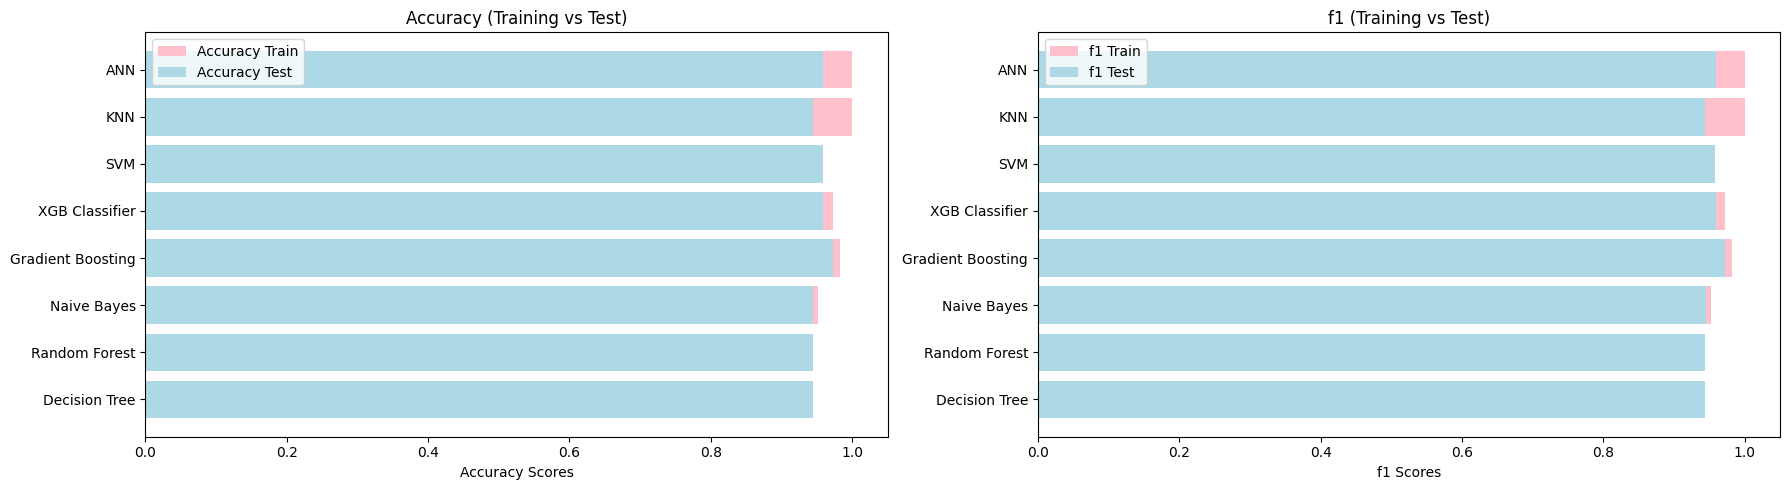

In [106]:
# creaate fig
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Accuracy Scores
axes[0].barh(performance_comparison['Model'], performance_comparison['Accuracy Train'], color='pink', label='Accuracy Train')
axes[0].barh(performance_comparison['Model'], performance_comparison['Accuracy Test'], color='lightblue', label='Accuracy Test')
axes[0].set_title('Accuracy (Training vs Test)')
axes[0].set_xlabel('Accuracy Scores')
axes[0].legend(loc="upper left")

# f1 Scores
axes[1].barh(performance_comparison['Model'], performance_comparison['f1 Train'], color='pink', label='f1 Train')
axes[1].barh(performance_comparison['Model'], performance_comparison['f1 Test'], color='lightblue', label='f1 Test')
axes[1].set_title('f1 (Training vs Test)')
axes[1].set_xlabel('f1 Scores')
axes[1].legend(loc="upper left")

plt.tight_layout()
plt.show()

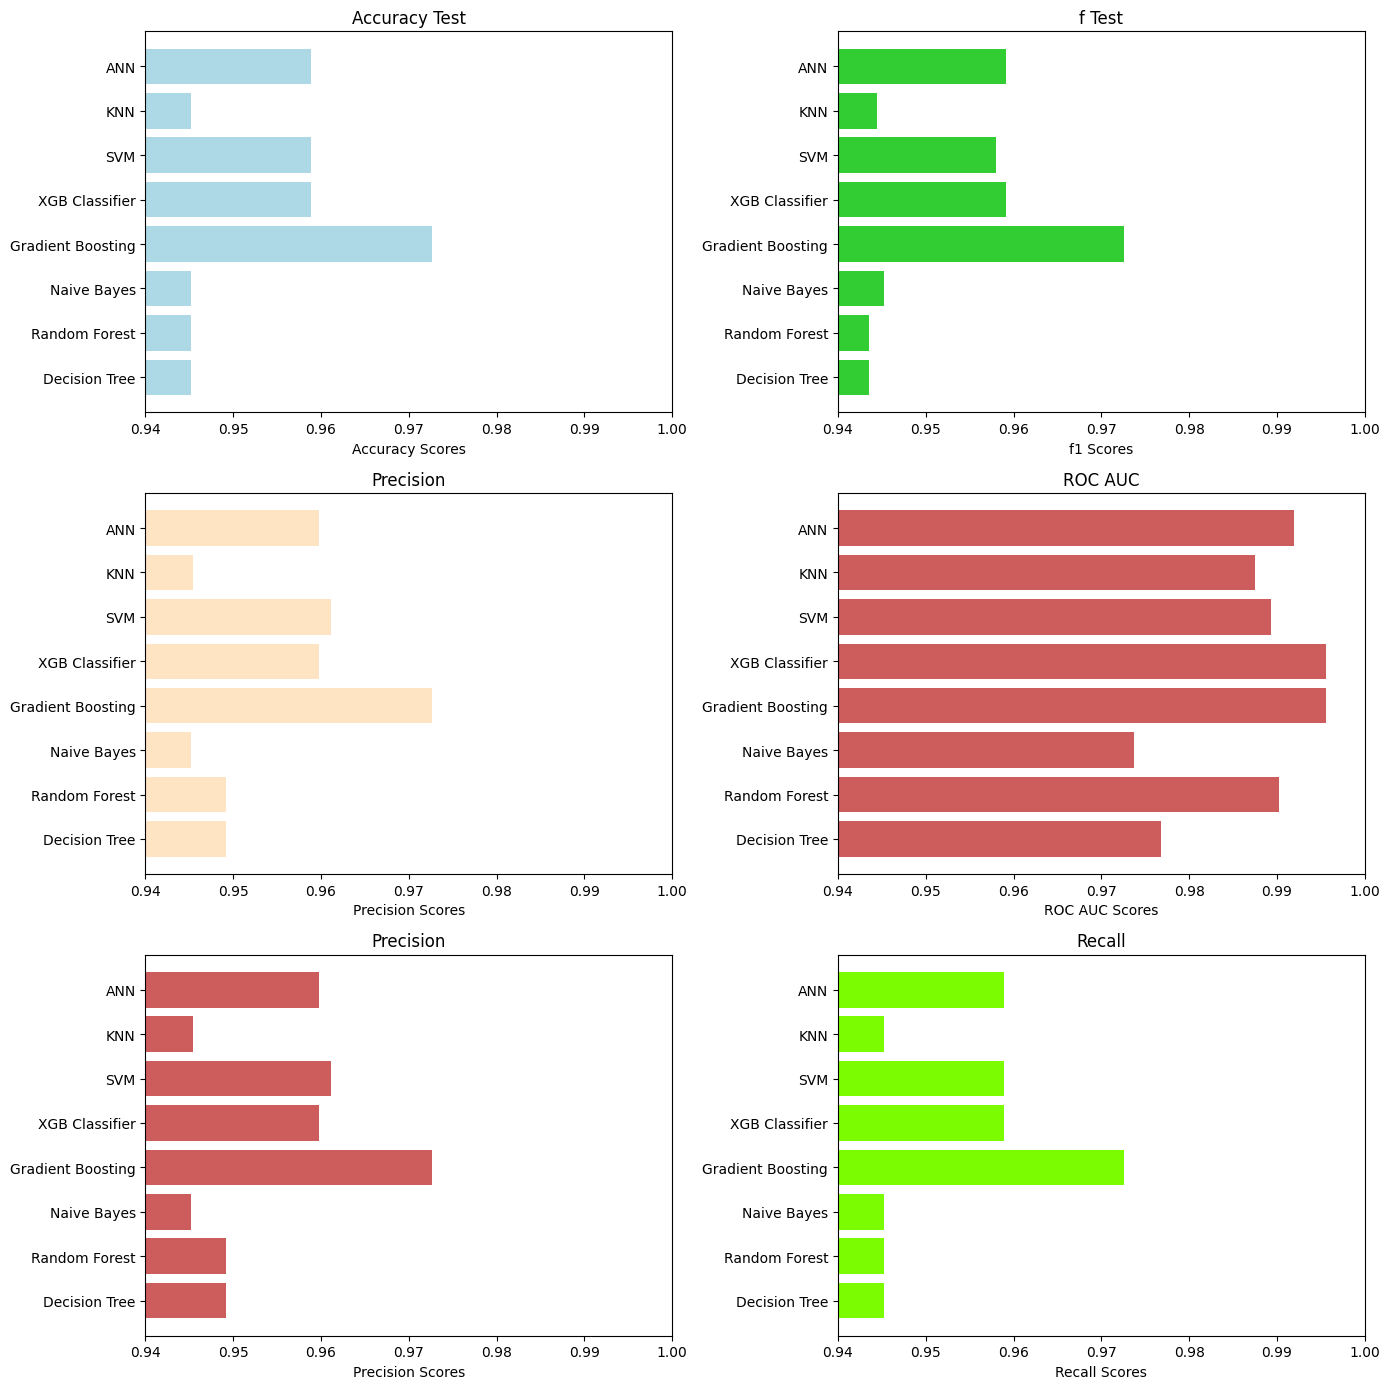

In [120]:
# creaate fig
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Accuracy Scores
axes[0,0].barh(performance_comparison['Model'], performance_comparison['Accuracy Test'], color='lightblue')
axes[0,0].set_title('Accuracy Test')
axes[0,0].set_xlabel('Accuracy Scores')
axes[0,0].set_xlim(0.94, 1.0) #duruma göre limiti değiştir

# f1 Scores
axes[0,1].barh(performance_comparison['Model'], performance_comparison['f1 Test'], color='limegreen')
axes[0,1].set_title('f Test')
axes[0,1].set_xlabel('f1 Scores')
axes[0,1].set_xlim(0.94, 1.0) #duruma göre limiti değiştir

# Precision Scores
axes[1,0].barh(performance_comparison['Model'], performance_comparison['Precision'], color='bisque')
axes[1,0].set_title('Precision')
axes[1,0].set_xlabel('Precision Scores')
axes[1,0].set_xlim(0.94, 1.0) #duruma göre limiti değiştir

# ROC AUC
axes[1,1].barh(performance_comparison['Model'], performance_comparison['ROC AUC'], color='indianred')
axes[1,1].set_title('ROC AUC')
axes[1,1].set_xlabel('ROC AUC Scores')
axes[1,1].set_xlim(0.94, 1.0) #duruma göre limiti değiştir

# Precision
axes[2,0].barh(performance_comparison['Model'], performance_comparison['Precision'], color='indianred')
axes[2,0].set_title('Precision')
axes[2,0].set_xlabel('Precision Scores')
axes[2,0].set_xlim(0.94, 1.0) #duruma göre limiti değiştir

# Recall
axes[2,1].barh(performance_comparison['Model'], performance_comparison['Recall'], color='lawngreen')
axes[2,1].set_title('Recall')
axes[2,1].set_xlabel('Recall Scores')
axes[2,1].set_xlim(0.94, 1.0) #duruma göre limiti değiştir

plt.tight_layout()
plt.show()